# KNN

##Importing the libraries.

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

## 1. Loading and visualization of the datasets.

In [6]:
#LOAD THE DATASET

In [8]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## To plot histgraph and boxgraph to understand data in a visuvalization.

In [11]:
# import the visualization tool

In [13]:
import seaborn as sns

<Axes: ylabel='Count'>

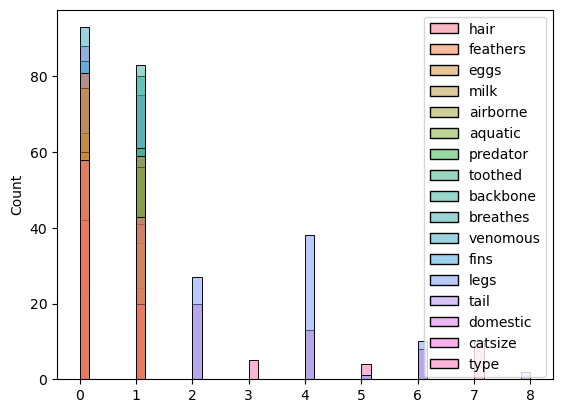

In [15]:
Hist_plot = sns.histplot(df)
Hist_plot 

<Axes: >

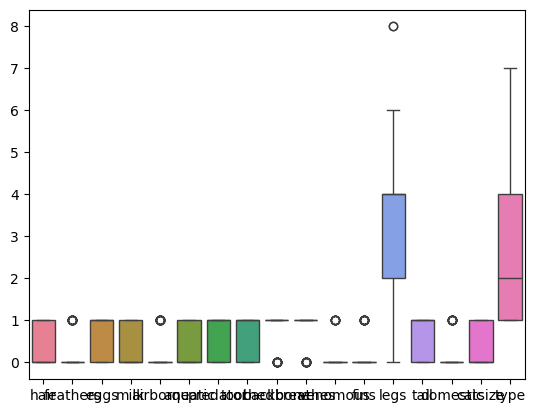

In [16]:
box_plot = sns.boxplot(df)
box_plot 

## To check data has null values are not.

In [18]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [19]:
## --> To observed above data there is no null values.

# 2. To check data has outliers are not.

In [25]:
Q2 = df[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','venomous','fins','legs','tail','domestic','catsize','type']].quantile(0.25)
Q3 = df[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','venomous','fins','legs','tail','domestic','catsize','type']].quantile(0.75)
IQR = Q3-Q2
print(Q2,Q3,IQR)

hair        0.0
feathers    0.0
eggs        0.0
milk        0.0
airborne    0.0
aquatic     0.0
predator    0.0
toothed     0.0
backbone    1.0
venomous    0.0
fins        0.0
legs        2.0
tail        0.0
domestic    0.0
catsize     0.0
type        1.0
Name: 0.25, dtype: float64 hair        1.0
feathers    0.0
eggs        1.0
milk        1.0
airborne    0.0
aquatic     1.0
predator    1.0
toothed     1.0
backbone    1.0
venomous    0.0
fins        0.0
legs        4.0
tail        1.0
domestic    0.0
catsize     1.0
type        4.0
Name: 0.75, dtype: float64 hair        1.0
feathers    0.0
eggs        1.0
milk        1.0
airborne    0.0
aquatic     1.0
predator    1.0
toothed     1.0
backbone    0.0
venomous    0.0
fins        0.0
legs        2.0
tail        1.0
domestic    0.0
catsize     1.0
type        3.0
dtype: float64


In [27]:
Lower_Extreame = Q2-1.5*IQR
Upper_Extreame = Q3+1.5*IQR
print(Lower_Extreame,Upper_Extreame)

hair       -1.5
feathers    0.0
eggs       -1.5
milk       -1.5
airborne    0.0
aquatic    -1.5
predator   -1.5
toothed    -1.5
backbone    1.0
venomous    0.0
fins        0.0
legs       -1.0
tail       -1.5
domestic    0.0
catsize    -1.5
type       -3.5
dtype: float64 hair        2.5
feathers    0.0
eggs        2.5
milk        2.5
airborne    0.0
aquatic     2.5
predator    2.5
toothed     2.5
backbone    1.0
venomous    0.0
fins        0.0
legs        7.0
tail        2.5
domestic    0.0
catsize     2.5
type        8.5
dtype: float64


In [29]:
outliers =df[(df[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','venomous','fins','legs','tail','domestic','catsize','type']]>Upper_Extreame)&(df[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','venomous','fins','legs','tail','domestic','catsize','type']]<Lower_Extreame)]
outliers

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
##To observed above data there is no outliers in the data.

In [33]:
df = df.drop(columns='animal name')

## Saperation of features and target.

In [36]:
target = df.typefeatures = df.drop(columns='type')

# 3. Split the dataset

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [42]:
# We will split the dataset into training and testing sets (80% training, 20% testing).
!pip install scikit-learn -U
from sklearn.model_selection import train_test_split

# Define features and target variable
y = df['type']
X = df.drop(columns=['type'])

# Perform one-hot encoding on categorical features
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder()
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling Imbalance data using Smote
from imblearn.over_sampling import SMOTE

# Before applying SMOTE, find the size of the smallest minority class
from collections import Counter
minority_class_size = min(Counter(y_train).values())

# Set k_neighbors to be one less than the minority class size, or 1 if the minority class size is 1
k_neighbors_value = min(minority_class_size - 1, 3) # Using min to ensure k_neighbors is not negative
k_neighbors_value = max(k_neighbors_value, 1)  # Ensure k_neighbors is at least 1

smote = SMOTE(random_state=42, k_neighbors=k_neighbors_value)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Defaulting to user installation because normal site-packages is not writeable


In [43]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define range of k values to explore
k_values = list(range(1, 31))

# Store accuracy and F1-score for each k
accuracies = []
f1_scores = []

# Loop through different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize KNN with current k
    knn.fit(X_train_resampled, y_train_resampled)  # Fit the model
    y_pred = knn.predict(X_test)  # Make predictions

In [44]:
#Step 4: Implement K-Nearest Neighboursand Value for K

#    Step 5: Choose Distance Metric

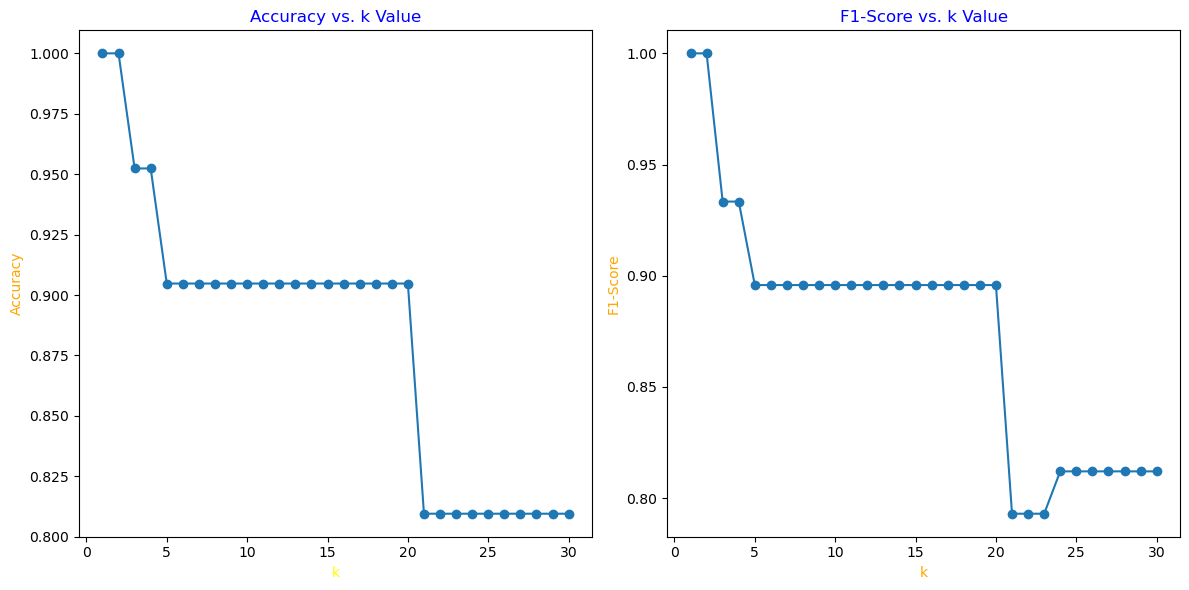


Optimal k value: 1


In [57]:
## The default distance metric in KNN is Euclidean distance.
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define range of k values to explore
k_values = list(range(1, 31))

# Store accuracy and F1-score for each k
accuracies = []
f1_scores = []

# Loop through different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize KNN with current k
    knn.fit(X_train_resampled, y_train_resampled)  # Fit the model
    y_pred = knn.predict(X_test)  # Make predictions
 # Calculate accuracy and F1-score
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Plot accuracy and F1-score against k values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k Value',color='blue')
plt.xlabel('k',color='yellow')
plt.ylabel('Accuracy',color='orange')

plt.subplot(1, 2, 2)
plt.plot(k_values, f1_scores, marker='o')
plt.title('F1-Score vs. k Value',color='blue')
plt.xlabel('k',color='orange')
plt.ylabel('F1-Score',color='orange')

plt.tight_layout()
plt.show()

# Find optimal k based on F1-score
optimal_k = k_values[np.argmax(f1_scores)]
print(f"\nOptimal k value: {optimal_k}")

# Step 6: Evaluate Classifier's Performance

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.81
Precision: 0.85
Recall: 0.81
F1 Score: 0.81


# Step 7: Visualize Decision Boundaries

In [63]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


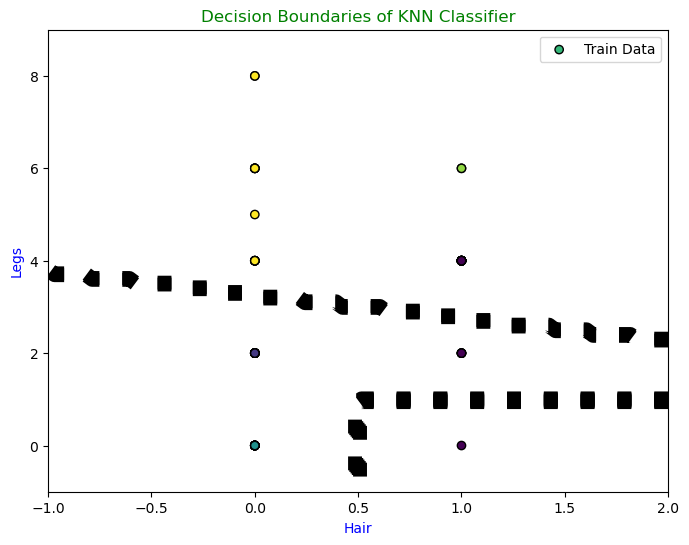

In [69]:
# To visualize decision boundaries, we will use a 2D plot. For simplicity, we will use only two features for visualization.
import numpy as np
import matplotlib.pyplot as plt

# For visualization, we will use only two features
X_vis = X[['hair', 'legs']]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Fit the KNN model on the reduced dataset
knn.fit(X_train_vis, y_train_vis)

# Create a contour plot
plt.figure(figsize=(8, 6))
plt.scatter(X_train_vis['hair'], X_train_vis['legs'], c=y_train_vis, edgecolor='k', marker='o', label='Train Data')

# Create a contour plot of the decision boundaries
x_min, x_max = X_vis['hair'].min() - 1, X_vis['hair'].max() + 1
y_min, y_max = X_vis['legs'].min() - 1, X_vis['legs'].max() + 1
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_range, y_range)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', linestyles=':', linewidths=10,linecolor='blue')
plt.title('Decision Boundaries of KNN Classifier',color='green')
plt.xlabel('Hair',color='blue')
plt.ylabel('Legs',color='blue')
plt.legend()
plt.show()

# **Interview Questions**

1. What are the key hyperparameters in KNN?

2. can What distance metrics be used in KNN?

In [ ]:
1.Euclidean Distance: The most commonly used metric, calculated as the straight-line distance between two points in Euclidean space.

2.Manhattan Distance: Also known as L1 distance or city block distance, it measures the absolute differences between coordinates.

3.**algorithm:** Method for finding neighbors (e.g., auto, ball_tree).

**leaf_size:** Affects the efficiency of tree-based algorithms.
